## House Price Prediction

In [14]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df = pd.read_csv('C:/Users/Home/Downloads/Shaik Ahmed ITR 4/USA_Housing.csv')

In [16]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [18]:
df.drop(columns='Address', inplace = True)

In [19]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [20]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [21]:
X = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']]
y = df['Price']

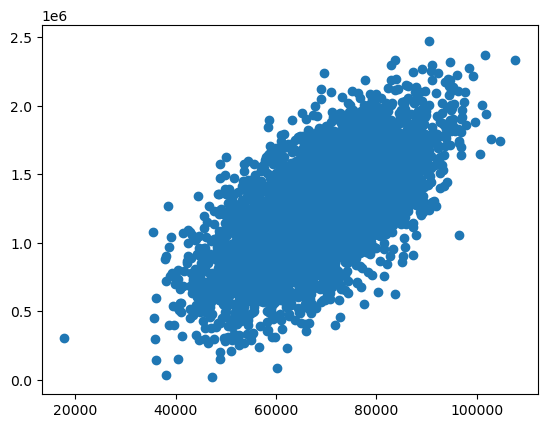

In [23]:
# checking relationship b/w features and target
plt.scatter(df['Avg. Area Income'],y)

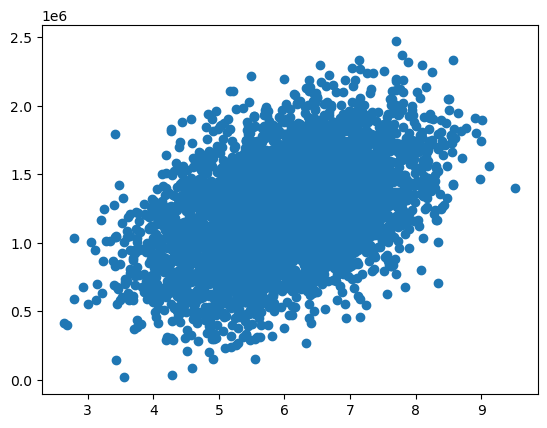

In [25]:
plt.scatter(X['Avg. Area House Age'],y)

In [26]:
# split the data into train and test
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
len(X_test)

1000

In [34]:
len(X_train)

4000

In [35]:
len(y_test)

1000

In [36]:
len(y_test)

1000

In [39]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [40]:
# train the model
model2.fit(X_train,y_train)

LinearRegression()

In [44]:
pred = model2.predict(X_test)

In [52]:
#evaluation of metrics
from sklearn.metrics import r2_score

In [53]:
X.loc[0]

Avg. Area Income             79545.458570
Avg. Area House Age              5.682861
Avg. Area Number of Rooms        7.009188
Area Population              23086.800500
Name: 0, dtype: float64

In [54]:
print(r2_score(pred,y_test))

0.9218498978441076


In [55]:
# using model to predict new datapoint
model2.predict([[90000,3,4,10000]])

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([434621.68525982])

In [56]:
model2.predict([[79545,5.8,7,23086]])

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1241361.31361737])

In [57]:
y.loc[0]

1059033.558

In [60]:
# to check the error in the regression
from sklearn.metrics import mean_squared_error
import numpy as np
print(np.sqrt(mean_squared_error(y_test,pred)))

98479.41751249754


In [61]:
print(mean_squared_error(y_test,pred)**0.5)

98479.41751249754
